In [58]:
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.datasets import make_classification

# Utilities
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

In [3]:
pd.options.display.max_columns = 100

In [4]:
def plot_confusion_matrix( cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues ):
    
    if normalize:
        cm = cm.astype( 'float' ) / cm.sum( axis = 1 )[ :, np.newaxis ]
        print( 'Normalized confusion matrix' )
    else:
        print( 'Confusion matrix, without normalization' )

    #print( cm )

    plt.imshow( cm, interpolation = 'nearest', cmap = cmap )
    plt.title( title )
    plt.colorbar()
    tick_marks = np.arange( len( classes ) )
    plt.xticks( tick_marks, classes, rotation = 45 )
    plt.yticks( tick_marks, classes )

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product( range( cm.shape[ 0 ] ), range( cm.shape[ 1 ] ) ):
        plt.text( j, i, format( cm[ i, j ], fmt ),
                 horizontalalignment = 'center',
                 color = 'white' if cm[ i, j ] > thresh else 'black' )

    plt.tight_layout()
    plt.ylabel( 'True label' )
    plt.xlabel( 'Predicted label' )

# Importando el dataset

In [5]:
music_df = pd.read_csv( './data/msd_genre_dataset.txt' )

In [6]:
music_df.shape

(59600, 34)

In [7]:
music_df.dtypes

genre              object
track_id           object
artist_name        object
title              object
loudness          float64
tempo             float64
time_signature      int64
key                 int64
mode                int64
duration          float64
avg_timbre1       float64
avg_timbre2       float64
avg_timbre3       float64
avg_timbre4       float64
avg_timbre5       float64
avg_timbre6       float64
avg_timbre7       float64
avg_timbre8       float64
avg_timbre9       float64
avg_timbre10      float64
avg_timbre11      float64
avg_timbre12      float64
var_timbre1       float64
var_timbre2       float64
var_timbre3       float64
var_timbre4       float64
var_timbre5       float64
var_timbre6       float64
var_timbre7       float64
var_timbre8       float64
var_timbre9       float64
var_timbre10      float64
var_timbre11      float64
var_timbre12      float64
dtype: object

In [8]:
music_df.head()

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


In [9]:
music_df[ 'genre' ].value_counts()

classic pop and rock     23895
folk                     13192
dance and electronica     4935
jazz and blues            4334
soul and reggae           4016
punk                      3200
metal                     2103
classical                 1874
pop                       1617
hip-hop                    434
Name: genre, dtype: int64

# 1. IDENTIFICACIÓN DE LOS GENEROS MUSICALES METAL Y POP 

In [10]:
genres = [ 'metal', 'pop' ]
music_df_filter = music_df.loc[ music_df[ 'genre' ].isin( genres ) ]

In [11]:
music_df_filter.shape

(3720, 34)

# Clase negativa Metal- Clase positiva POP

In [12]:
music_df_filter.loc[ music_df_filter[ 'genre' ] == 'metal', 'genre' ] = 0
music_df_filter.loc[ music_df_filter[ 'genre' ] == 'pop', 'genre' ] = 1

D:\programasAparte\Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [13]:
music_df_filter[ 'genre' ].value_counts( dropna = False )

0    2103
1    1617
Name: genre, dtype: int64

In [14]:
X = music_df_filter[ music_df_filter.columns.tolist()[ 4: ] ]

# 2. ELECCIÓN DE VARIABLES

In [15]:
music_df_filter.columns.tolist()[ 4: ]

['loudness',
 'tempo',
 'time_signature',
 'key',
 'mode',
 'duration',
 'avg_timbre1',
 'avg_timbre2',
 'avg_timbre3',
 'avg_timbre4',
 'avg_timbre5',
 'avg_timbre6',
 'avg_timbre7',
 'avg_timbre8',
 'avg_timbre9',
 'avg_timbre10',
 'avg_timbre11',
 'avg_timbre12',
 'var_timbre1',
 'var_timbre2',
 'var_timbre3',
 'var_timbre4',
 'var_timbre5',
 'var_timbre6',
 'var_timbre7',
 'var_timbre8',
 'var_timbre9',
 'var_timbre10',
 'var_timbre11',
 'var_timbre12']

# 3. PARTICIÓN EN PRUEBA Y ENTRENAMIENTO

In [16]:
Y = music_df_filter[ 'genre' ]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3 )

In [18]:
X_train.shape

(2604, 30)

In [19]:
X_test.shape

(1116, 30)

# Preprocessing

## 4: METODO DE ESCALADO

#### Rangos iniciales variables dataframes

In [20]:
X_train.describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,2604.000000,2604.000000,2604.000000,2604.00000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000
mean,-7.255163,129.399628,3.722734,5.37596,0.638249,252.859415,46.857437,27.776497,13.114485,-3.535819,-15.178323,-15.139900,-1.821595,-1.810717,6.498807,4.025088,-0.349221,3.245578,28.897974,1801.523094,1476.073748,1111.364350,796.800856,660.655817,497.622459,395.146458,321.843970,254.575031,224.041761,253.696301
std,3.449345,35.118148,1.142181,3.56763,0.480600,104.680079,4.641232,40.677350,24.088558,11.370366,23.617152,11.064965,12.693952,5.844732,9.343926,5.904303,3.277805,7.587382,21.962097,1501.091352,1054.024018,878.000876,431.771785,410.467487,272.232502,272.553117,172.792447,153.026863,140.845468,142.690890
min,-28.917000,0.000000,1.000000,0.00000,0.000000,6.843630,19.807814,-166.670427,-94.290527,-47.710321,-108.266448,-41.688385,-68.323298,-27.845344,-70.692450,-21.523574,-31.350857,-40.488174,0.810455,112.294714,131.584215,124.117331,116.294185,84.417581,85.911869,70.537483,44.135621,42.911461,37.231937,46.342437
25%,-8.838000,102.061250,4.000000,2.00000,0.000000,199.646890,44.374206,4.770851,0.145622,-10.409647,-31.707346,-23.594507,-9.798156,-5.366574,0.529657,0.117691,-2.217330,-1.247210,12.718105,822.886371,713.689909,576.555588,517.848703,388.209717,303.395581,237.753458,213.651145,161.863100,137.040368,158.832581
50%,-6.511500,124.957000,4.000000,6.00000,1.000000,236.068120,47.555735,32.037950,14.120445,-4.244597,-15.966398,-16.534093,-2.054531,-1.703799,6.590982,4.424127,-0.277230,2.703956,23.485049,1472.613634,1262.645700,905.097701,725.573955,563.165557,443.817286,347.360659,286.394207,229.109164,188.770814,228.166110
75%,-4.938750,149.911000,4.000000,9.00000,1.000000,285.988122,50.274825,54.972656,26.947049,2.517661,2.761985,-8.700716,6.523226,1.823786,12.348098,8.141982,1.539543,7.554391,39.335515,2238.425081,1942.582460,1398.847729,971.578152,820.331778,626.841379,488.581387,387.594585,313.254005,273.093785,316.354907
max,-0.205000,253.036000,7.000000,11.00000,1.000000,2390.203630,55.567055,157.781888,173.548413,74.099457,77.766938,60.600486,49.892265,20.173355,48.120922,24.627562,13.566470,45.154550,220.598889,24313.380409,14852.043066,11758.310773,8212.825633,4097.375165,3630.722525,3741.866434,3101.172111,2352.679280,1461.783282,2629.604610


<AxesSubplot:>

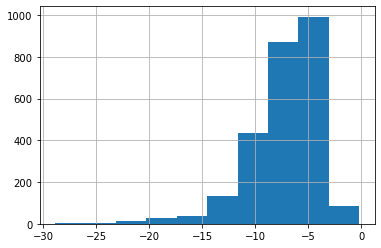

In [21]:
X_train["loudness"].hist()

In [22]:
X_test.describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,-7.227658,127.536074,3.691756,5.327957,0.631720,249.478812,46.919028,26.121004,13.397541,-3.581650,-14.779648,-15.425872,-1.340133,-1.742746,6.373907,3.811263,-0.311365,2.639210,28.586629,1805.425379,1507.199628,1084.070920,782.848725,650.972946,489.478614,383.962584,319.598317,251.714055,218.178619,249.506864
std,3.152410,36.527068,1.203867,3.595210,0.482554,94.712308,4.333154,39.380914,23.540313,11.423888,23.762457,10.556347,12.868138,6.003491,8.941110,5.575893,3.006359,7.157771,21.385771,1450.664398,1075.506347,738.093710,387.200897,379.203493,264.561054,216.543375,166.932521,130.731166,121.552490,125.893065
min,-23.881000,0.000000,0.000000,0.000000,0.000000,27.062400,28.384500,-136.281104,-64.257394,-40.780010,-137.779000,-40.081350,-77.496969,-32.500173,-52.333460,-18.004991,-13.861377,-23.464194,1.655687,163.981725,200.338615,171.949007,162.975620,88.338597,85.318034,60.610087,68.988304,21.861296,43.611187,59.177686
25%,-9.087500,100.058500,4.000000,2.000000,0.000000,198.379957,44.209434,1.366418,-0.277664,-10.497493,-31.759186,-24.100400,-10.216896,-5.485720,0.739491,0.111517,-2.128838,-2.005694,11.607339,813.406442,718.739034,559.774196,512.257766,390.218315,291.189258,242.754003,213.096653,164.285861,136.201948,153.377393
50%,-6.605000,122.281000,4.000000,5.000000,1.000000,234.461585,47.568088,30.196416,13.979361,-4.473055,-15.130578,-16.391054,-1.801374,-1.528970,5.943382,4.273686,-0.251997,2.372927,23.878710,1455.199972,1261.644516,909.030078,711.561954,557.336801,435.126560,339.618223,285.671760,228.134009,187.763444,227.855393
75%,-4.911000,149.001500,4.000000,9.000000,1.000000,281.965260,50.267303,54.482593,26.687898,2.282836,2.586676,-8.126227,7.222011,2.134951,12.030913,7.951465,1.475319,7.074321,39.616243,2381.694515,1982.832297,1399.245044,965.361621,809.898287,622.538796,486.353060,387.735982,310.537710,271.795413,318.439703
max,-1.125000,250.332000,7.000000,11.000000,1.000000,1242.696690,55.564543,161.506928,202.846549,76.577478,72.972076,24.487306,50.228389,19.958364,44.541997,17.413557,14.622630,55.835938,183.965122,16478.739568,8785.408936,7902.228089,3652.273356,3357.676845,2541.288455,3032.749237,2419.401667,1965.562742,1259.834757,1377.557099


<AxesSubplot:>

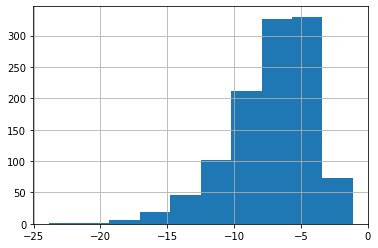

In [23]:
X_test["loudness"].hist()

#### Aplicación del método de escalado

In [40]:
scaler = StandardScaler()
X_train_standardScaler = scaler.fit_transform( X_train )

In [41]:
X_test_standardScaler = scaler.transform( X_test )

#### Rangos escalados variables dataframes

In [42]:
pd.DataFrame(X_train_standardScaler, columns = music_df.columns[4:]).describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03
mean,5.116235e-19,-2.754240e-17,2.602671e-16,8.160395e-17,9.980922e-17,7.333270e-18,4.468179e-17,8.015435e-18,1.088266e-17,1.321694e-17,6.736376e-18,-2.575172e-17,3.010052e-17,-4.259266e-17,6.139482e-18,4.996856e-17,2.127501e-17,1.411228e-17,-2.963153e-18,1.398438e-17,1.769365e-17,8.185976e-18,1.551925e-17,-1.969751e-17,1.688358e-17,-1.108518e-18,-8.868141e-18,-2.941835e-18,2.438739e-17,-2.387576e-17
std,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00
min,-6.281191e+00,-3.685402e+00,-2.384261e+00,-1.507161e+00,-1.328281e+00,-2.350620e+00,-5.829232e+00,-4.781144e+00,-4.459613e+00,-3.885802e+00,-3.942304e+00,-2.399789e+00,-5.239856e+00,-4.455230e+00,-8.262703e+00,-4.327957e+00,-9.459865e+00,-5.765118e+00,-1.279154e+00,-1.125550e+00,-1.275823e+00,-1.124642e+00,-1.576382e+00,-1.404128e+00,-1.512640e+00,-1.191222e+00,-1.607487e+00,-1.383445e+00,-1.326601e+00,-1.453447e+00
25%,-4.589686e-01,-7.786182e-01,2.427978e-01,-9.464571e-01,-1.328281e+00,-5.084324e-01,-5.351398e-01,-5.656727e-01,-5.384861e-01,-6.046550e-01,-7.000081e-01,-7.642348e-01,-6.284956e-01,-6.085035e-01,-6.389495e-01,-6.619151e-01,-5.700364e-01,-5.922532e-01,-7.368594e-01,-6.520754e-01,-7.234468e-01,-6.092380e-01,-6.461880e-01,-6.638734e-01,-7.135966e-01,-5.775873e-01,-6.262635e-01,-6.059703e-01,-6.178268e-01,-6.649474e-01
50%,2.156368e-01,-1.265295e-01,2.427978e-01,1.749508e-01,7.528526e-01,-1.604366e-01,1.504842e-01,1.047824e-01,4.176895e-02,-6.234752e-02,-3.337519e-02,-1.260249e-01,-1.835366e-02,1.829647e-02,9.866593e-03,6.759747e-02,2.196726e-02,-7.139829e-02,-2.465140e-01,-2.191556e-01,-2.025277e-01,-2.349727e-01,-1.649959e-01,-2.375559e-01,-1.976822e-01,-1.753602e-01,-2.051975e-01,-1.664463e-01,-2.504711e-01,-1.789539e-01
75%,6.716804e-01,5.841798e-01,2.427978e-01,1.016007e+00,7.528526e-01,3.165365e-01,7.364519e-01,6.687108e-01,5.743483e-01,5.324932e-01,7.597764e-01,5.820552e-01,6.575119e-01,6.219619e-01,6.261195e-01,6.974039e-01,5.763389e-01,5.680010e-01,4.753437e-01,2.911121e-01,4.426828e-01,3.274924e-01,4.048687e-01,3.890847e-01,4.747550e-01,3.428795e-01,3.805910e-01,3.835290e-01,3.483353e-01,4.392056e-01
max,2.044306e+00,3.521260e+00,2.869857e+00,1.576711e+00,7.528526e-01,2.042179e+01,1.876935e+00,3.196628e+00,6.661451e+00,6.829172e+00,3.936254e+00,6.846378e+00,4.074680e+00,3.762070e+00,4.455312e+00,3.490070e+00,4.246245e+00,5.524570e+00,8.730393e+00,1.499987e+01,1.269282e+01,1.212868e+01,1.717910e+01,8.374304e+00,1.151112e+01,1.228151e+01,1.608787e+01,1.371333e+01,8.789628e+00,1.665393e+01


<AxesSubplot:>

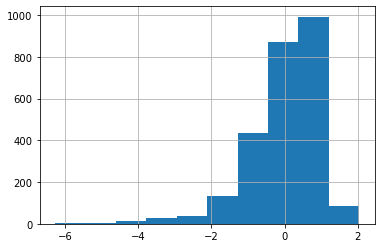

In [43]:
pd.DataFrame(X_train_standardScaler, columns = music_df.columns[4:])["loudness"].hist()

In [44]:
pd.DataFrame(X_test_standardScaler, columns = music_df.columns[4:]).describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.007976,-0.053075,-0.027127,-0.013458,-0.013587,-0.032301,0.013273,-0.040706,0.011753,-0.004032,0.016884,-0.025850,0.037936,0.011632,-0.013370,-0.036222,0.011551,-0.079933,-0.014179,0.002600,0.029536,-0.031092,-0.032320,-0.023594,-0.029921,-0.041042,-0.012999,-0.018699,-0.041636,-0.029366
std,0.914091,1.040319,1.054210,1.007924,1.004260,0.904953,0.933801,0.968315,0.977428,1.004900,1.006346,0.954217,1.013917,1.027360,0.957074,0.944559,0.917363,0.943559,0.973945,0.966592,1.020577,0.840814,0.896944,0.924011,0.972007,0.794652,0.966272,0.854466,0.863186,0.882448
min,-4.820924,-3.685402,-3.259947,-1.507161,-1.328281,-2.157434,-3.980944,-4.033918,-3.212593,-3.276178,-5.192168,-2.254525,-5.962675,-5.251797,-6.297521,-3.731907,-4.123111,-3.520964,-1.240661,-1.091110,-1.210580,-1.070154,-1.468245,-1.394574,-1.514821,-1.227653,-1.463630,-1.521030,-1.281300,-1.363479
25%,-0.531315,-0.835658,0.242798,-0.946457,-1.328281,-0.520538,-0.570648,-0.649382,-0.556062,-0.612382,-0.702204,-0.809964,-0.661489,-0.628893,-0.616488,-0.662961,-0.543034,-0.692239,-0.787446,-0.658392,-0.718656,-0.628355,-0.659139,-0.658979,-0.758443,-0.559237,-0.629473,-0.590135,-0.623781,-0.703186
50%,0.188525,-0.202744,0.242798,-0.105401,0.752853,-0.175787,0.153146,0.059502,0.035911,-0.082444,0.002022,-0.113095,0.001593,0.048214,-0.059454,0.042113,0.029667,-0.115036,-0.228586,-0.230759,-0.203478,-0.230493,-0.197454,-0.251759,-0.229612,-0.203773,-0.209379,-0.172820,-0.257625,-0.181132
75%,0.679727,0.558277,0.242798,1.016007,0.752853,0.278099,0.734831,0.656661,0.563588,0.511837,0.752352,0.633985,0.712571,0.675211,0.592167,0.665130,0.556742,0.504717,0.488129,0.386574,0.480877,0.327945,0.390468,0.363661,0.458947,0.334702,0.381409,0.365775,0.339115,0.453819
max,1.777537,3.444248,2.869857,1.576711,0.752853,9.457648,1.876394,3.288221,7.877952,7.047151,3.733191,3.582010,4.101164,3.725279,4.072217,2.268014,4.568523,6.932623,7.062027,9.779575,6.936027,7.735947,6.614654,6.571870,7.508503,9.679249,12.141506,11.183111,7.355522,7.877704


<AxesSubplot:>

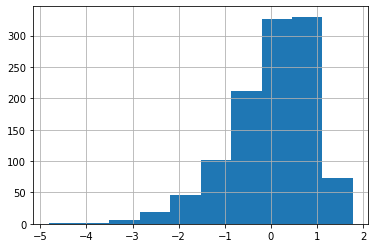

In [45]:
pd.DataFrame(X_test_standardScaler, columns = music_df.columns[4:])["loudness"].hist()

##### Ejemplo MinMaxScaler 

In [59]:
minScaler = MinMaxScaler()
X_train_minMaxScaler = minScaler.fit_transform( X_train )

In [60]:
X_test_minMaxScaler = minScaler.transform( X_test )

In [61]:
pd.DataFrame(X_train_minMaxScaler, columns = music_df.columns[4:]).describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000
mean,0.754452,0.511388,0.453789,0.488724,0.638249,0.103222,0.756437,0.599308,0.401006,0.362652,0.500384,0.259544,0.562546,0.542177,0.649685,0.553587,0.690193,0.510653,0.127793,0.069800,0.091335,0.084857,0.084049,0.143594,0.116145,0.088417,0.090842,0.091638,0.131136,0.080268
std,0.120136,0.138787,0.190363,0.324330,0.480600,0.043921,0.129791,0.125372,0.089937,0.093345,0.126951,0.108174,0.107380,0.121718,0.078644,0.127934,0.072974,0.088593,0.099924,0.062026,0.071603,0.075467,0.053328,0.102286,0.076797,0.074238,0.056523,0.066252,0.098870,0.055237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.699324,0.403347,0.500000,0.181818,0.000000,0.080896,0.686994,0.528402,0.352586,0.306221,0.411534,0.176890,0.495071,0.468125,0.599445,0.468922,0.648603,0.458194,0.054178,0.029362,0.039544,0.038889,0.049596,0.075703,0.061353,0.045546,0.055451,0.051499,0.070063,0.043546
50%,0.780353,0.493831,0.500000,0.545455,1.000000,0.096177,0.775965,0.612442,0.404762,0.356833,0.496148,0.245914,0.560576,0.544403,0.650461,0.562233,0.691796,0.504329,0.103166,0.056209,0.076836,0.067128,0.075252,0.119301,0.100966,0.075401,0.079246,0.080613,0.106377,0.070385
75%,0.835130,0.592449,0.500000,0.818182,1.000000,0.117122,0.852004,0.683130,0.452651,0.412348,0.596820,0.322495,0.633136,0.617866,0.698916,0.642791,0.732243,0.560965,0.175282,0.087853,0.123026,0.109568,0.105636,0.183384,0.152598,0.113867,0.112350,0.117043,0.165569,0.104524
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

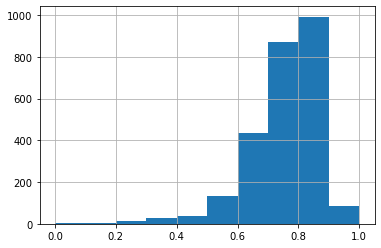

In [62]:
pd.DataFrame(X_train_minMaxScaler, columns = music_df.columns[4:])["loudness"].hist()

In [63]:
pd.DataFrame(X_test_minMaxScaler, columns = music_df.columns[4:]).describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.755410,0.504023,0.448626,0.484360,0.631720,0.101804,0.758160,0.594206,0.402063,0.362275,0.502527,0.256748,0.566619,0.543592,0.648634,0.548954,0.691036,0.503573,0.126377,0.069961,0.093449,0.082511,0.082326,0.141181,0.113847,0.085371,0.090108,0.090400,0.127020,0.078646
std,0.109794,0.144355,0.200644,0.326837,0.482554,0.039739,0.121176,0.121377,0.087890,0.093785,0.127732,0.103201,0.108853,0.125024,0.075253,0.120818,0.066931,0.083577,0.097302,0.059942,0.073062,0.063442,0.047823,0.094495,0.074633,0.058982,0.054606,0.056599,0.085327,0.048734
min,0.175397,0.000000,-0.166667,0.000000,0.000000,0.008483,0.239845,0.093663,0.112131,0.056895,-0.158641,0.015711,-0.077601,-0.096938,0.154520,0.076240,0.389370,0.198779,0.003846,0.002136,0.004671,0.004111,0.005766,0.000977,-0.000168,-0.002704,0.008130,-0.009114,0.004478,0.004969
25%,0.690635,0.395432,0.500000,0.181818,0.000000,0.080364,0.682386,0.517909,0.351005,0.305500,0.411256,0.171944,0.491529,0.465644,0.601211,0.468788,0.650573,0.449337,0.049124,0.028970,0.039887,0.037446,0.048905,0.076203,0.057909,0.046908,0.055270,0.052548,0.069475,0.041434
50%,0.777097,0.483255,0.500000,0.454545,1.000000,0.095503,0.776310,0.606767,0.404235,0.354957,0.500641,0.247313,0.562717,0.548044,0.645010,0.558973,0.692358,0.500464,0.104957,0.055489,0.076768,0.067466,0.073521,0.117848,0.098514,0.073292,0.079010,0.080191,0.105669,0.070265
75%,0.836096,0.588855,0.500000,0.818182,1.000000,0.115434,0.851794,0.681619,0.451683,0.410420,0.595878,0.328112,0.639047,0.624346,0.696246,0.638663,0.730813,0.555359,0.176560,0.093773,0.125760,0.109602,0.104868,0.180785,0.151384,0.113260,0.112397,0.115867,0.164658,0.105331
max,0.967958,0.989314,1.000000,1.000000,1.000000,0.518534,0.999930,1.011481,1.109387,1.020343,0.974226,0.646949,1.002843,0.995523,0.969878,0.843687,1.023513,1.124720,0.833323,0.676269,0.587877,0.668556,0.436728,0.815673,0.692668,0.806850,0.776983,0.832400,0.858237,0.515323


<AxesSubplot:>

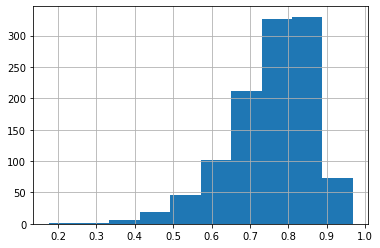

In [64]:
pd.DataFrame(X_test_minMaxScaler, columns = music_df.columns[4:])["loudness"].hist()

##### Ejemplo MaxAbsScaler

In [65]:
maxScaler = MaxAbsScaler([-1,1])
X_train_maxAbsScaler = maxScaler.fit_transform( X_train )

D:\programasAparte\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass copy=[-1, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [66]:
X_test_maxAbsScaler = maxScaler.transform( X_test )

In [67]:
pd.DataFrame(X_train_maxAbsScaler, columns = music_df.columns[4:]).describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03,2.604000e+03
mean,4.817788e-18,1.577506e-18,4.253936e-17,2.156600e-16,5.545999e-16,1.025912e-19,-1.065882e-19,-5.372047e-18,-2.347606e-18,-4.103647e-19,3.133694e-18,1.033906e-18,-7.034823e-19,-9.955341e-18,-2.323623e-18,-8.377835e-18,1.808003e-18,-3.298906e-18,-1.809335e-18,1.284388e-18,1.529541e-18,1.140494e-18,8.313882e-19,-1.071212e-18,3.730588e-18,-1.303041e-18,-1.119176e-18,3.783882e-19,9.166588e-19,-2.419553e-18
std,1.592360e-01,2.713930e-01,3.485164e-01,6.343535e-01,7.529972e-01,4.897671e-02,1.715821e-01,2.091951e-01,1.501463e-01,1.464588e-01,2.537075e-01,1.460907e-01,1.908816e-01,2.244984e-01,1.210490e-01,2.311003e-01,1.057301e-01,1.734903e-01,1.145644e-01,6.668003e-02,7.879982e-02,8.246504e-02,5.822146e-02,1.194358e-01,8.688918e-02,8.143888e-02,6.217058e-02,7.293578e-02,1.137923e-01,6.005741e-02
min,-1.000000e+00,-1.000000e+00,-8.307945e-01,-9.558894e-01,-1.000000e+00,-1.151035e-01,-1.000000e+00,-1.000000e+00,-6.694657e-01,-5.690004e-01,-1.000000e+00,-3.505195e-01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.465174e-01,-7.503727e-02,-1.005153e-01,-9.272584e-02,-9.176165e-02,-1.676710e-01,-1.314068e-01,-9.699317e-02,-9.991924e-02,-1.008832e-01,-1.509280e-01,-8.727351e-02
25%,-7.307031e-02,-2.112709e-01,8.460277e-02,-6.002731e-01,-1.000000e+00,-2.489656e-02,-9.180280e-02,-1.183132e-01,-8.083616e-02,-8.854001e-02,-1.775632e-01,-1.116261e-01,-1.199452e-01,-1.365818e-01,-7.732936e-02,-1.529394e-01,-6.025841e-02,-1.027304e-01,-8.440163e-02,-4.347206e-02,-5.699653e-02,-5.023119e-02,-3.761478e-02,-7.927505e-02,-6.199192e-02,-4.702903e-02,-3.892769e-02,-4.418843e-02,-7.029044e-02,-3.992735e-02
50%,3.433055e-02,-3.433262e-02,8.460277e-02,1.109594e-01,5.667870e-01,-7.856149e-03,2.581544e-02,2.191576e-02,6.270248e-03,-9.129586e-03,-8.465908e-03,-1.840753e-02,-3.502703e-03,4.106739e-03,1.194112e-03,1.561879e-02,2.322154e-03,-1.238453e-02,-2.823630e-02,-1.461050e-02,-1.595608e-02,-1.937332e-02,-9.604458e-03,-2.836724e-02,-1.717314e-02,-1.427840e-02,-1.275480e-02,-1.213756e-02,-2.849621e-02,-1.074544e-02
75%,1.069352e-01,1.585118e-01,8.460277e-02,6.443837e-01,5.667870e-01,1.549994e-02,1.263377e-01,1.398642e-01,8.621970e-02,7.797331e-02,1.927239e-01,8.501651e-02,1.254828e-01,1.396026e-01,7.577660e-02,1.611393e-01,6.092464e-02,9.852374e-02,5.444700e-02,1.940764e-02,3.487663e-02,2.700149e-02,2.356752e-02,4.646174e-02,4.124315e-02,2.791836e-02,2.365702e-02,2.796762e-02,3.963027e-02,2.637248e-02
max,3.254647e-01,9.554616e-01,1.000000e+00,1.000000e+00,5.667870e-01,1.000000e+00,3.219867e-01,6.685906e-01,1.000000e+00,1.000000e+00,9.984653e-01,1.000000e+00,7.776321e-01,8.444166e-01,5.392076e-01,8.064013e-01,4.488696e-01,9.582753e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot:>

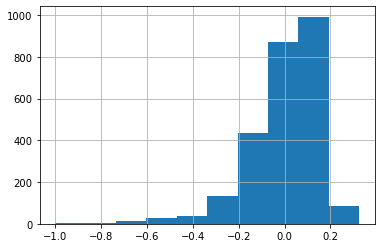

In [68]:
pd.DataFrame(X_train_maxAbsScaler, columns = music_df.columns[4:])["loudness"].hist()

In [69]:
pd.DataFrame(X_test_maxAbsScaler, columns = music_df.columns[4:]).describe()

,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.001270,-0.014402,-0.009452,-0.008535,-0.010229,-0.001582,0.002277,-0.008514,0.001764,-0.000590,0.004283,-0.003776,0.007240,0.002611,-0.001618,-0.008369,0.001221,-0.013865,-0.001624,0.000173,0.002327,-0.002563,-0.001881,-0.002817,-0.002599,-0.003342,-0.000808,-0.001364,-0.004737,-0.001763
std,0.145528,0.282281,0.367339,0.639257,0.756059,0.044313,0.160193,0.202528,0.146729,0.147148,0.255268,0.139375,0.193501,0.230596,0.115831,0.218246,0.096974,0.163667,0.111558,0.064440,0.080406,0.069324,0.052211,0.110339,0.084441,0.064703,0.060062,0.062309,0.098205,0.052987
min,-0.767517,-1.000000,-1.135927,-0.955889,-1.000000,-0.105644,-0.682928,-0.843714,-0.482266,-0.479733,-1.317039,-0.329302,-1.137946,-1.178794,-0.762162,-0.862279,-0.435853,-0.610736,-0.142108,-0.072741,-0.095375,-0.088233,-0.085467,-0.166530,-0.131596,-0.099959,-0.090977,-0.110916,-0.145774,-0.081871
25%,-0.084588,-0.226748,0.084603,-0.600273,-1.000000,-0.025489,-0.097894,-0.135822,-0.083475,-0.089672,-0.178120,-0.118305,-0.126242,-0.141158,-0.074611,-0.153181,-0.057404,-0.120074,-0.090196,-0.043893,-0.056619,-0.051807,-0.038369,-0.078691,-0.065888,-0.045535,-0.039127,-0.043034,-0.070968,-0.042223
50%,0.030014,-0.055013,0.084603,-0.066849,0.566787,-0.008608,0.026272,0.012445,0.005391,-0.012072,0.000513,-0.016519,0.000304,0.010822,-0.007195,0.009730,0.003136,-0.019954,-0.026183,-0.015384,-0.016031,-0.019004,-0.011494,-0.030063,-0.019947,-0.016592,-0.013015,-0.012602,-0.029310,-0.010876
75%,0.108216,0.151483,0.084603,0.644384,0.566787,0.013618,0.126060,0.137344,0.084604,0.074949,0.190841,0.092601,0.135991,0.151555,0.071668,0.153682,0.058853,0.087547,0.055911,0.025772,0.037886,0.027039,0.022729,0.043426,0.039870,0.027253,0.023708,0.026673,0.038581,0.027250
max,0.282994,0.934565,1.000000,1.000000,0.566787,0.463116,0.321894,0.687748,1.182618,1.031919,0.946956,0.523198,0.782687,0.836159,0.492843,0.524038,0.482937,1.202512,0.808901,0.651977,0.546453,0.637823,0.385041,0.784766,0.652282,0.788116,0.754700,0.815492,0.836841,0.473024


<AxesSubplot:>

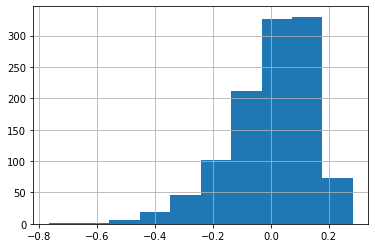

In [70]:
pd.DataFrame(X_test_maxAbsScaler, columns = music_df.columns[4:])["loudness"].hist()

# Regresión Logística

In [71]:
logmodel = LogisticRegression( random_state = 1 )

In [72]:
logmodel.fit( X_train, Y_train.astype( int ) )

LogisticRegression(random_state=1)

In [73]:
logmodel_predictions = logmodel.predict( X_test )

Confusion matrix, without normalization


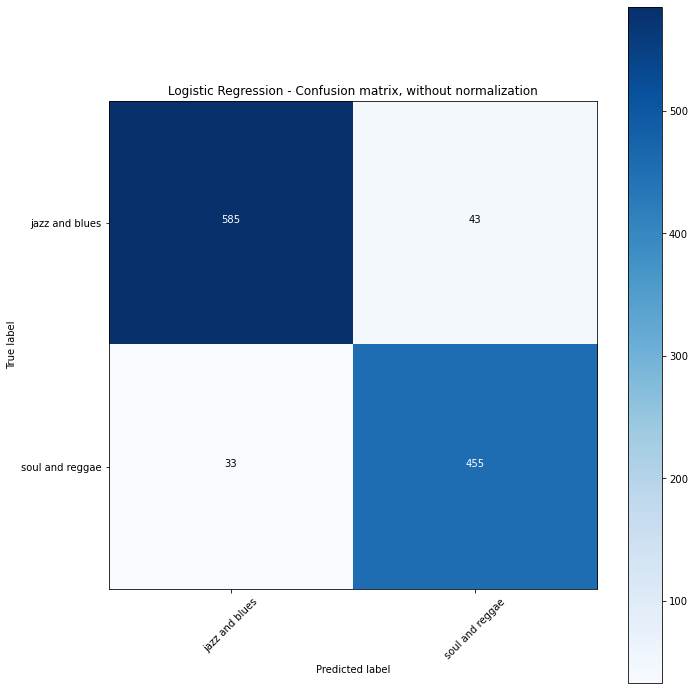

In [74]:
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), logmodel_predictions.round().tolist() )
np.set_printoptions( precision = 2 )

plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = [ 'jazz and blues', 'soul and reggae' ],
                      title = 'Logistic Regression - Confusion matrix, without normalization' )

In [75]:
accuracy_score( Y_test.tolist(), logmodel_predictions )

0.931899641577061

In [76]:
precision_score( Y_test.tolist(), logmodel_predictions )

0.9136546184738956

# Redes Neuronales

In [77]:
neuralmodel = MLPClassifier( random_state = 1 )

In [78]:
neuralmodel.fit( X_train, Y_train.astype( int ) )

D:\programasAparte\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

In [79]:
neuralmodel_predictions = neuralmodel.predict( X_test )

Confusion matrix, without normalization


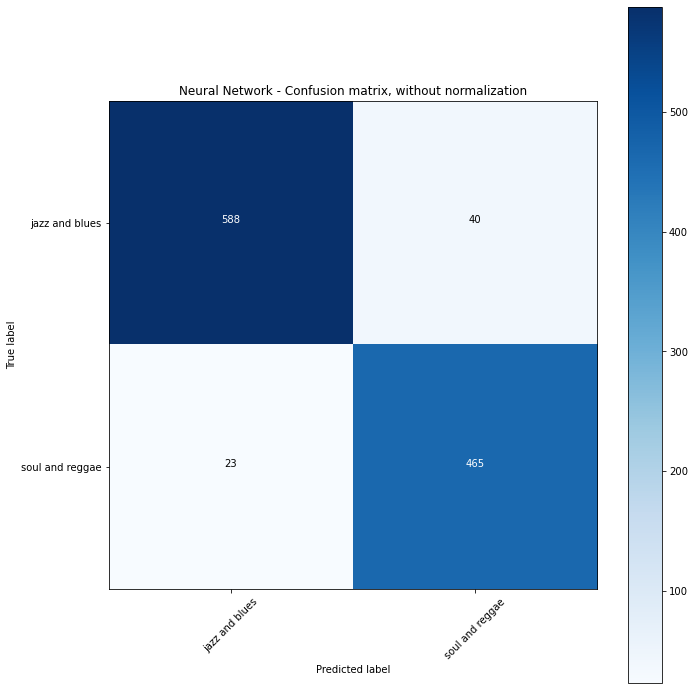

In [80]:
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), neuralmodel_predictions.round().tolist() )
np.set_printoptions( precision = 2 )

plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = [ 'jazz and blues', 'soul and reggae' ],
                      title = 'Neural Network - Confusion matrix, without normalization' )

In [81]:
accuracy_score( Y_test.tolist(), neuralmodel_predictions )

0.9435483870967742

In [82]:
precision_score( Y_test.tolist(), neuralmodel_predictions )

0.9207920792079208

# SVM

In [83]:
svmmodel = SVC( random_state = 1 )

In [84]:
svmmodel.fit( X_train, Y_train.astype( int ) )

SVC(random_state=1)

In [85]:
svmmodel_predictions = svmmodel.predict( X_test )

Confusion matrix, without normalization


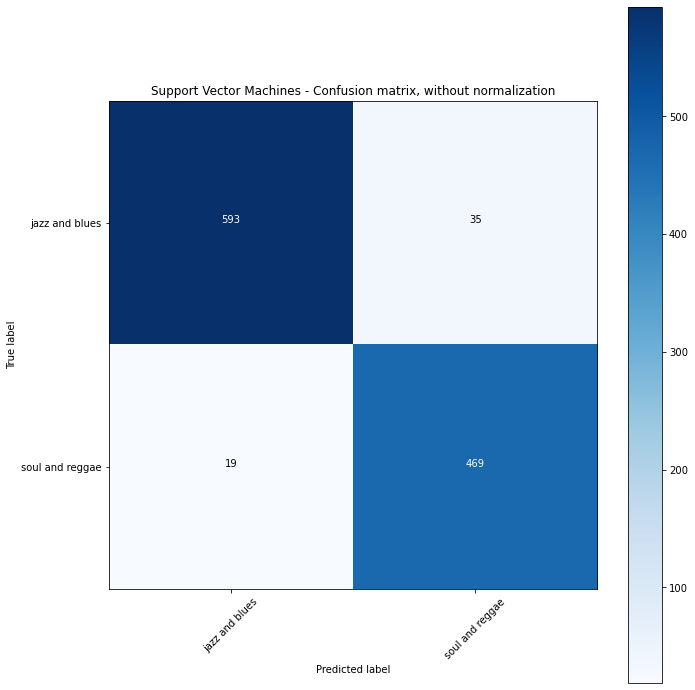

In [86]:
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), svmmodel_predictions.round().tolist() )
np.set_printoptions( precision = 2 )

plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = [ 'jazz and blues', 'soul and reggae' ],
                      title = 'Support Vector Machines - Confusion matrix, without normalization' )

In [87]:
accuracy_score( Y_test.tolist(), svmmodel_predictions )

0.9516129032258065

In [88]:
precision_score( Y_test.tolist(), svmmodel_predictions )

0.9305555555555556

# 5. Construya cuatro modelos de clasificación

# RandomForestClassifier

In [89]:
randomForestClassifier_Model = RandomForestClassifier( random_state=1)

In [90]:
randomForestClassifier_Model.fit( X_train, Y_train.astype( int ) )

RandomForestClassifier(random_state=1)

In [91]:
randomForestClassifier_predictions=randomForestClassifier_Model.predict(X_test)

Confusion matrix, without normalization


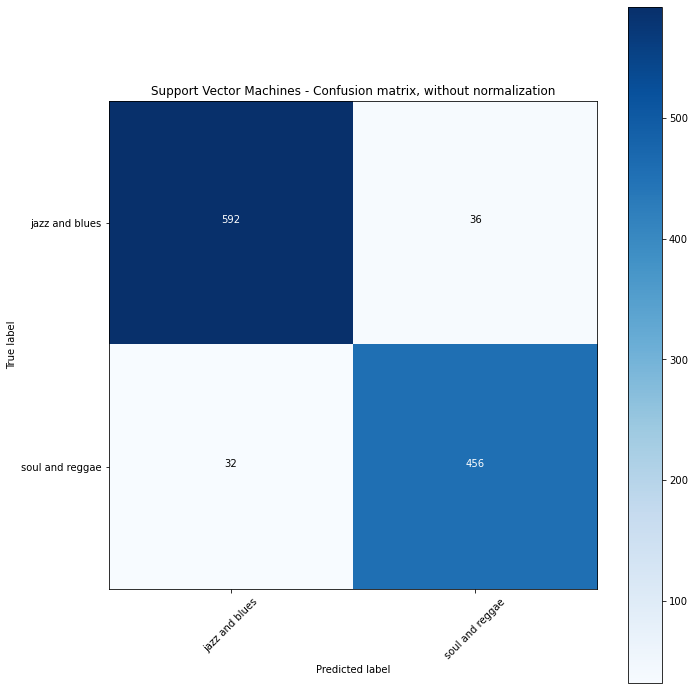

In [92]:
cnf_matrix = confusion_matrix( Y_test.ravel().tolist(), randomForestClassifier_predictions.round().tolist() )
np.set_printoptions( precision = 2 )

plt.figure( figsize = ( 10, 10 ) )
plot_confusion_matrix( cnf_matrix, classes = [ 'jazz and blues', 'soul and reggae' ],
                      title = 'Support Vector Machines - Confusion matrix, without normalization' )

In [93]:
accuracy_score( Y_test.tolist(), randomForestClassifier_predictions )

0.9390681003584229

In [94]:
precision_score( Y_test.tolist(), randomForestClassifier_predictions )

0.926829268292683

# RESPUESTAS

### 1. IDENTIFICACIÓN DE LOS GENEROS MUSICALES METAL Y POP

En  este caso para la realización del ejercicio se seleccionaron los generos de POP y METAL

#### a)¿Cuál debe ser la clase positiva y cuál la clase negativa?

Usualmente la clase negativa es la más grande y la positiva la más pequeña,por eso en este caso Metal sera la negativa y pop como positiva.

### 2. ANALICE LAS VARIABLES QUE UTILIZARÁ PARA ENTRENAR EL MODELO

#### b)¿Qué variables deben ser tenidas en cuentas y cuales deben ser descartadas?

Las variables que se descartaron fueron track, artisc_name y title, debido a que son variables que no nos permiten realizar esa agrupación de intancias similares o distintas, ejemplo el nombre artista  no es algo que me permita distinguir o saber el genero musical.El resto de las variables si nos permiten realizar es agrupación de intancias.

### 3.Partición prueba Entrenamiento

### 4. METODO DE ESCALADO

#### a) ¿En qué rangos se encontraban anteriormente las variables y en qué rango se encuentran ahora?

Analizando los resultados obtenidos sobre los rangos de las variables, inicialmente se observa que para las medidas del dataFrame antes del escalado, en la variable 'loudness' se tenía una media de -7.250650, un valor mínimo de -28.917000 y un valor máximo de -1.550000 y posterior al escalado se obtuvo valores de 2.659829e-16, -6.382044e+00 y 1.679184e+00 respectivamente. Para el valor de la media su variación es alta con respecto al valor inicial, siendo el cambio más drástico observado sobre las tres unidades de medida expuestas. El rango contemplado entre el valor mínimo y máximo varió de una diferencia de 27.367 a 8.061228, siendo alta igualmente. Este comportamiento se observa en las otras variables, en las cuales la variación más alta fue en la medida media y el rango del mínimo y máximo se redujo significativamente.

#### b) ¿Qué otro método de escalamiento podría aplicar?

El paquete de sklearn.preprocessing provee clases para el escalado de las variables aparte de StandardScaler(). Entre esos está MinMaxScaler o MaxAbsScaler. La primera consiste en escalar las variables en un rango de mínimo de cero (0) y máximo de uno (1), la última consiste en que el valor absoluto máximo de cada rasgo se escale a la unidad de tamaño.

## 5. Construya cuatro modelos de clasificación

#### ¿Cúal modelo produce las mejores metricas? Dependiendo del balanceo de las clases ,¿qué metrica es más confiable?

Realizando las comparaciones de los cuatro modelos se puede observar que el modelo de maquinas de soporte vectorial tuvo las mejores metricas.

Observando los resultados obtenidos se puede evidenciar que la metrica más confiable es la de accuaryci_score

## 6.Valide el modelo realizando la validación cruzada

#### a) ¿ Varian mucho las métricas respecto a las que se registraron previamente?¿Son similares entre todos los folds construidos?

xxxxxxx

## 7) Entrene un modelo usando una red neuronal

#### a ¿Cuales son las clases o géneros para las que más se equivoca el modelo?

La clase para la que peor se comporta el modelo es "pop", se puede observar que el modelo solo identifica correctamente
en un 0.007 por ciento de manera correcta el genero, siendo este porcentaje el menor del resto de las clases.

La segunda clase para la cual el modelo se equivoca identificando el genero es para "hip-hop" ya que se puede observar que
acierta identificando el genero solo un 22 porciento.

La tercera clase que identifica peor el genero es para "soul and reggae" ya que solo acierta identificando el genero en un
29 porciento.